In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chemin vers le fichier CSV
file_path = r'C:/Users/pc/Desktop/2017-05-12_6C-40per_3_6C_CH34.csv'

# Charger le dataset
df = pd.read_csv(file_path)
# Supprimer les colonnes non désirées
df = df.drop(columns=['Data_Point', 'DateTime', 'Step_Time', 'Step_Index'])

df



,Test_Time,Cycle_Index,Current,Voltage,Charge_Capacity,Discharge_Capacity,Charge_Energy,Discharge_Energy,dV/dt,Internal_Resistance,Temperature
0,0.0000,0.0,0.000000,3.301579,0.000000,0.000000,0.000000,0.000000,0.000010,0.021019,30.809696
1,10.0021,0.0,0.000000,3.301599,0.000000,0.000000,0.000000,0.000000,-0.000060,0.021019,30.804575
2,20.0001,0.0,0.000000,3.301561,0.000000,0.000000,0.000000,0.000000,0.000010,0.021019,30.804575
3,20.0002,0.0,0.000000,3.301561,0.000000,0.000000,0.000000,0.000000,0.000010,0.021019,30.792536
4,30.0015,0.0,0.000000,3.301567,0.000000,0.000000,0.000000,0.000000,-0.000027,0.021019,30.792536
...,...,...,...,...,...,...,...,...,...,...,...
891780,264017.5522,842.0,-0.047428,2.000416,0.881732,0.879951,3.116662,2.549023,0.000556,0.019551,36.170414
891781,264017.6177,842.0,-0.047428,2.003624,0.881732,0.879951,3.116662,2.549023,0.000556,0.019551,36.170414
891782,264017.6202,842.0,0.000000,2.003624,0.881732,0.879951,3.116662,2.549023,0.000556,0.019551,36.170414
891783,454966.6522,842.0,0.000000,2.980706,0.881732,0.879951,3.116663,2.549023,0.000556,0.000000,36.170414


In [14]:

# Calculer la matrice de corrélation
correlation_matrix = df.corr()

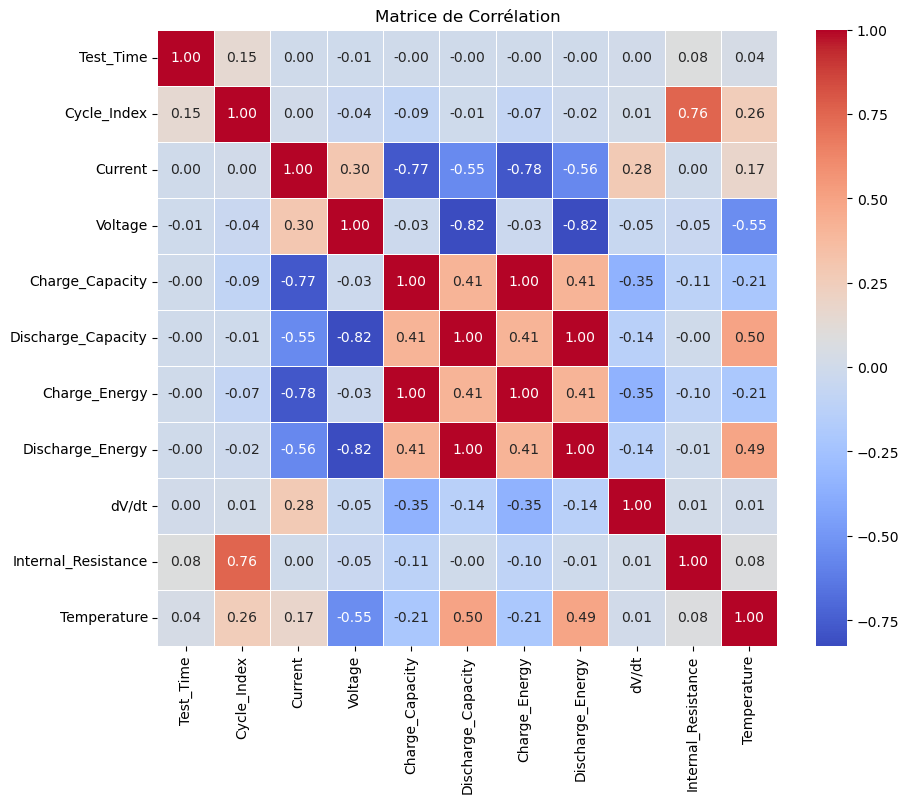

In [15]:
# Afficher la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()

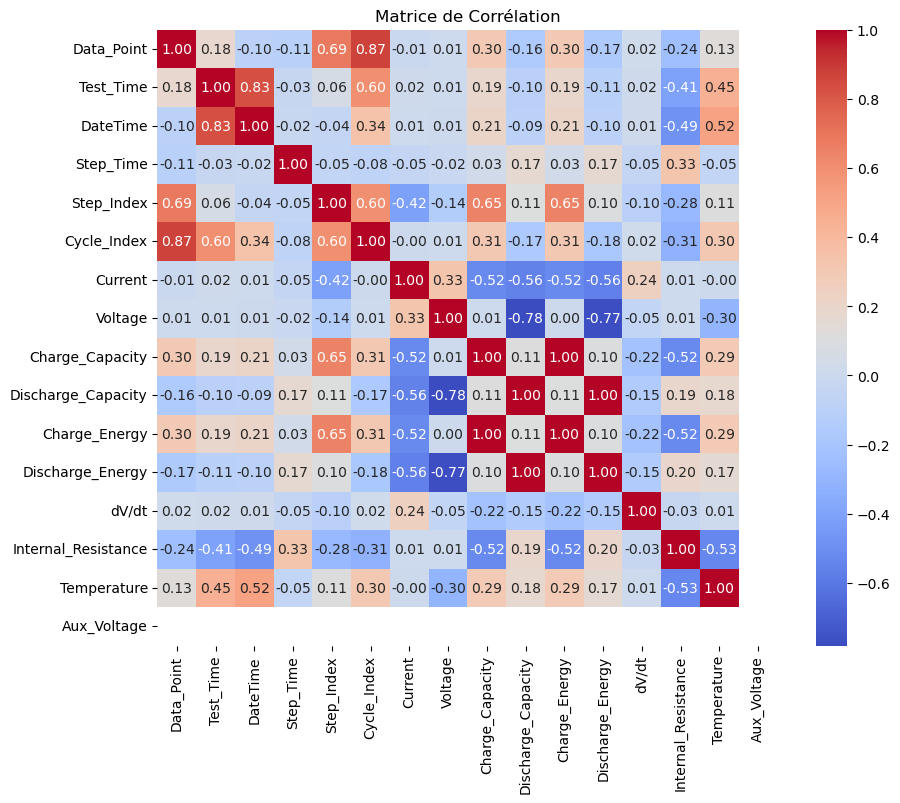

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Chemin vers les données
data_path = 'C:\\Users\\pc\\Desktop\\data'

# Fonction pour charger les fichiers CSV d'un batch
def load_batch(batch_path):
    all_files = [os.path.join(batch_path, f) for f in os.listdir(batch_path) if f.endswith('.csv')]
    df_list = [pd.read_csv(file) for file in all_files]
    return pd.concat(df_list, ignore_index=True)

# Charger les données des trois batchs
batch1_data = load_batch(os.path.join(data_path, 'batch 1'))
batch2_data = load_batch(os.path.join(data_path, 'batch 2'))
batch3_data = load_batch(os.path.join(data_path, 'batch 3'))

# Concaténer les données des trois batchs en une seule DataFrame
all_data = pd.concat([batch1_data, batch2_data, batch3_data], ignore_index=True)

# Calculer la matrice de corrélation
correlation_matrix = all_data.corr()

# Afficher la matrice de corrélation avec Matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matrice de Corrélation')
plt.show()
